<a href="https://colab.research.google.com/github/RahulArra/Machine-Learning/blob/main/house_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/drive/MyDrive/Datasets/house_price_train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:

cols_to_drop = ['Alley', 'PoolQC', 'Fence', 'MiscFeature']
df_cleaned = df.drop(columns=cols_to_drop)

df_cleaned['LotFrontage'] = df_cleaned['LotFrontage'].fillna(df_cleaned['LotFrontage'].median())
df_cleaned['MasVnrArea'] = df_cleaned['MasVnrArea'].fillna(0)
df_cleaned['GarageYrBlt'] = df_cleaned['GarageYrBlt'].fillna(0)

for col in ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    df_cleaned[col] = df_cleaned[col].fillna('None')

df_cleaned['Electrical'] = df_cleaned['Electrical'].fillna(df_cleaned['Electrical'].mode()[0])

print("Missing values remaining:", df_cleaned.isnull().sum().sum())

Missing values remaining: 0


In [5]:
from sklearn.model_selection import train_test_split

X = df_cleaned.drop(columns=['SalePrice', 'Id'])
y = df_cleaned['SalePrice']

# One-Hot Encode all categorical features
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (1168, 285)
Testing set shape: (292, 285)


In [6]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
254,20,70.0,8400,5,6,1957,1957,0.0,922,0,...,False,False,False,True,False,False,False,False,True,False
1066,60,59.0,7837,6,7,1993,1994,0.0,0,0,...,False,False,False,True,False,False,False,False,True,False
638,30,67.0,8777,5,7,1910,1950,0.0,0,0,...,False,False,False,True,False,False,False,False,True,False
799,50,60.0,7200,5,7,1937,1950,252.0,569,0,...,False,False,False,True,False,False,False,False,True,False
380,50,50.0,5000,5,6,1924,1950,0.0,218,0,...,False,False,False,True,False,False,False,False,True,False


In [7]:
X_train.isnull().sum()

,0
MSSubClass,0
LotFrontage,0
LotArea,0
OverallQual,0
OverallCond,0
...,...
SaleCondition_AdjLand,0
SaleCondition_Alloca,0
SaleCondition_Family,0
SaleCondition_Normal,0


In [8]:
import numpy as np
constant_features2 = [cols for cols in X_train.columns if X_train[cols].nunique() == 1]

len(constant_features2)

2

In [9]:
X_train = X_train.drop(columns=constant_features2)
X_test = X_test.drop(columns=constant_features2)

Quasi Constanat features

In [10]:
quasi_constant_feature =[]
for feature in X_train.columns :
  predominant = (X_train[feature].value_counts() / np.float64(len(X_train))).sort_values(ascending=False).values[0]

  if predominant > 0.96:
    quasi_constant_feature.append(feature)

print(quasi_constant_feature)

['LowQualFinSF', '3SsnPorch', 'PoolArea', 'MiscVal', 'MSZoning_C (all)', 'MSZoning_RH', 'Street_Grvl', 'Street_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LandContour_HLS', 'LandContour_Low', 'Utilities_AllPub', 'Utilities_NoSeWa', 'LotConfig_FR2', 'LotConfig_FR3', 'LandSlope_Sev', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_Artery', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Artery', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnh

In [11]:
X_train = X_train.drop(columns=quasi_constant_feature)
X_test = X_test.drop(columns=quasi_constant_feature)

In [12]:
print(X_train.shape)
print(X_test.shape)

(1168, 132)
(292, 132)


In [13]:
duplicated_feat_fast = X_train.T.duplicated()
duplicated_columns = X_train.columns[duplicated_feat_fast].tolist()
print("Duplicate columns found with the faster method:")
print(duplicated_columns)

Duplicate columns found with the faster method:
['GarageFinish_None', 'GarageQual_None', 'GarageCond_None']


In [14]:
X_train = X_train.drop(columns=duplicated_columns)
X_test = X_test.drop(columns= duplicated_columns)

<Axes: >

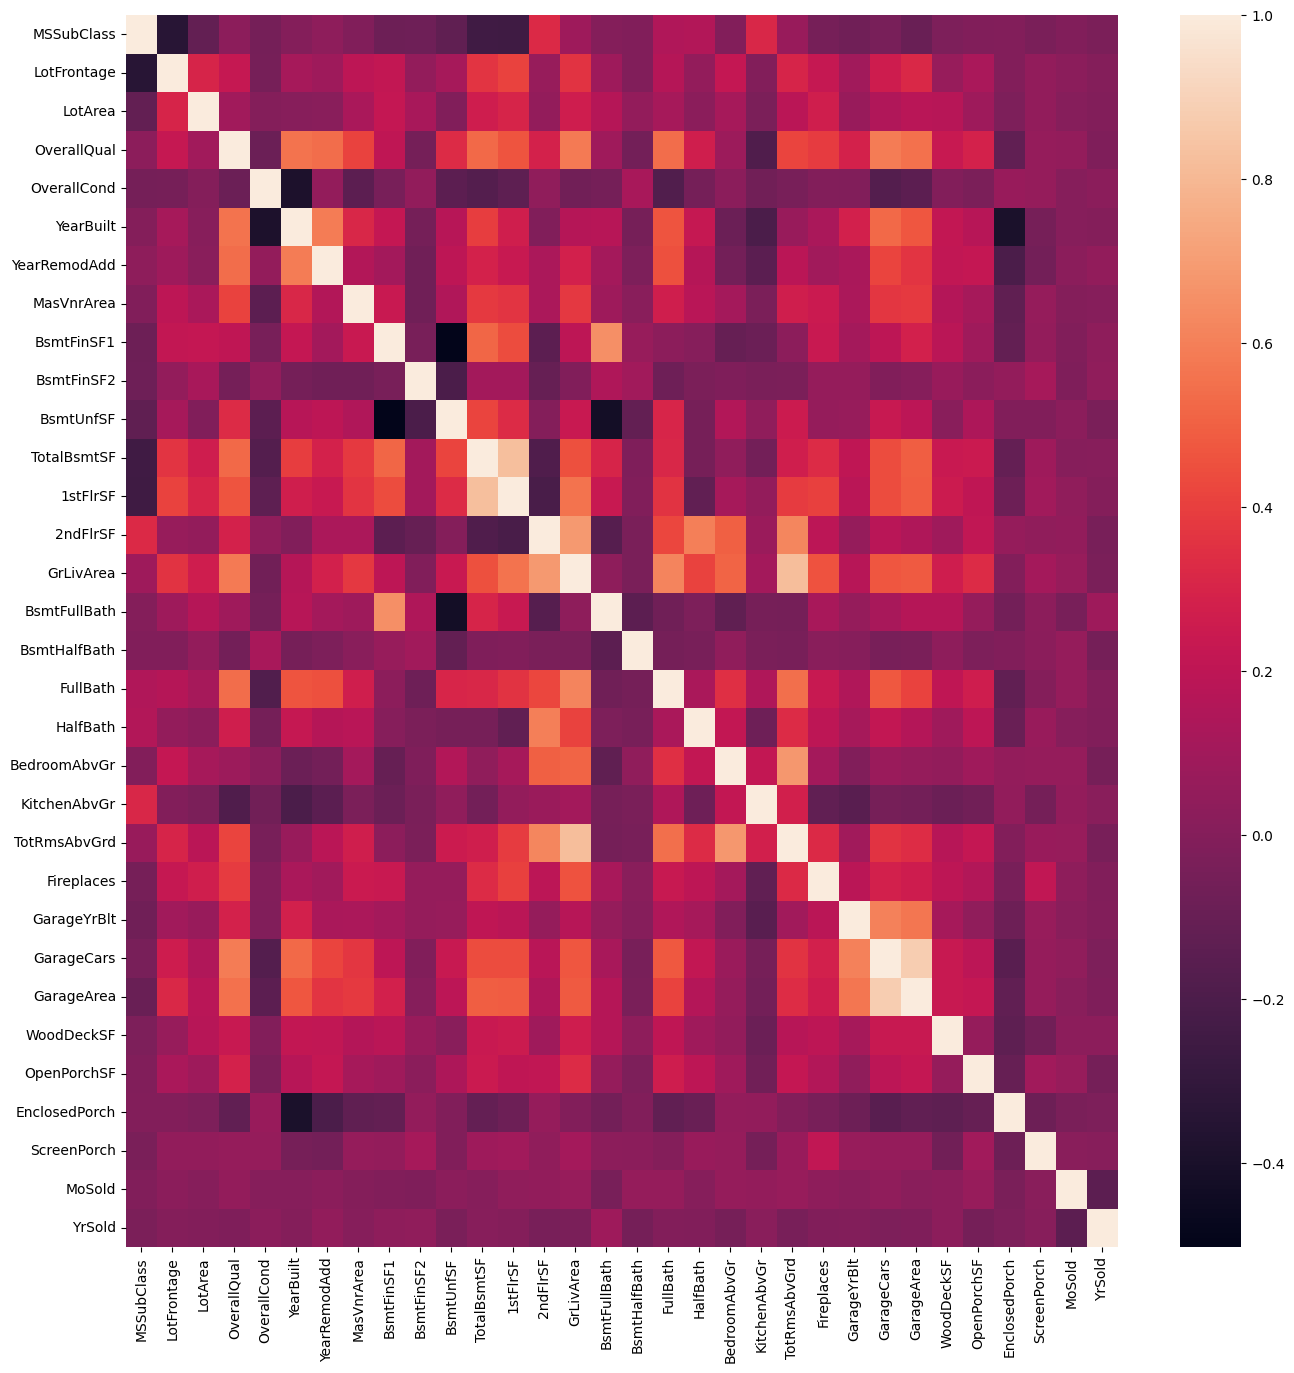

In [15]:
corrmat = X_train.select_dtypes(include=np.number).corr()
fig , ax = plt.subplots()
fig.set_size_inches(16,16)
sns.heatmap(corrmat)

In [16]:
grouped_feature_ls = []
correlated_features_ls = []
def correlation(dataset , threshold):
  col_corr = set()
  corr_matrix = dataset.select_dtypes(include=np.number).corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

corr_features = correlation(X_train , 0.7)
correlated_features = list(set(corr_features))
print(len(correlated_features))

3


In [17]:
X_train = X_train.drop(columns=correlated_features)
X_test = X_test.drop(columns=correlated_features)

In [18]:
X_train.shape

(1168, 126)

In [19]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression

mi_scores = mutual_info_regression(X_train, y_train)

mi_df = pd.DataFrame({'Feature': X_train.columns, 'Mutual Info Score': mi_scores})

threshold = 0.01

# Identify features to drop
features_to_drop = mi_df[mi_df['Mutual Info Score'] < threshold]['Feature']

print(f"Found {len(features_to_drop)} features to drop with Mutual Info score < {threshold}:")
print(list(features_to_drop))

X_train = X_train.drop(columns=features_to_drop)
X_test = X_test.drop(columns=features_to_drop)

print("\nShape of x_train after final selection:", X_train.shape)
print("Shape of x_test after final selection:", X_test.shape)

Found 22 features to drop with Mutual Info score < 0.01:
['EnclosedPorch', 'ScreenPorch', 'MoSold', 'LotConfig_Inside', 'LandSlope_Gtl', 'LandSlope_Mod', 'Condition1_Norm', 'BldgType_TwnhsE', 'HouseStyle_1Story', 'HouseStyle_SLvl', 'Exterior1st_Plywood', 'Exterior2nd_HdBoard', 'Exterior2nd_Plywood', 'ExterCond_Gd', 'BsmtCond_TA', 'BsmtExposure_Mn', 'BsmtFinType1_BLQ', 'BsmtFinType1_LwQ', 'BsmtFinType2_Unf', 'Functional_Typ', 'SaleCondition_Abnorml', 'SaleCondition_Normal']

Shape of x_train after final selection: (1168, 104)
Shape of x_test after final selection: (292, 104)


In [20]:
from sklearn.feature_selection import f_regression, SelectKBest
import pandas as pd

f_scores, p_values = f_regression(X_train, y_train)

regression_df = pd.DataFrame({
    'Feature': X_train.columns,
    'F-Score': f_scores,
    'P-Value': p_values
}).sort_values(by='P-Value')
print("Top 10 most significant features based on F-test:")
print(regression_df.head(10))

features_to_drop = regression_df[regression_df['P-Value'] > 0.05]['Feature']

print(f"\nFound {len(features_to_drop)} features to drop with a P-value > 0.05:")
print(list(features_to_drop))

X_train = X_train.drop(columns=features_to_drop)
X_test = X_test.drop(columns=features_to_drop)

print("\nShape of X_train after F-test selection:", X_train.shape)
print("Shape of X_test after F-test selection:", X_test.shape)

Top 10 most significant features based on F-test:
           Feature      F-Score        P-Value
3      OverallQual  1879.151818  2.596140e-245
13       GrLivArea  1093.390361  1.081567e-169
22      GarageCars   813.186816  3.931616e-136
11     TotalBsmtSF   648.289096  4.473745e-114
61    ExterQual_TA   591.973984  4.437347e-106
16        FullBath   512.439469   2.457699e-94
66     BsmtQual_Ex   492.493738   2.650738e-91
5        YearBuilt   424.230726   1.225755e-80
86  KitchenQual_TA   418.220173   1.120645e-79
84  KitchenQual_Ex   413.303354   6.892678e-79

Found 7 features to drop with a P-value > 0.05:
['BsmtHalfBath', 'Neighborhood_Gilbert', 'LandContour_Lvl', 'LotConfig_Corner', 'Neighborhood_NWAmes', 'YrSold', 'BsmtFinSF2']

Shape of X_train after F-test selection: (1168, 97)
Shape of X_test after F-test selection: (292, 97)


In [21]:
# import statsmodels.api as sm
# import pandas as pd

# def forward_selection(X, y, significance_level=0.05):
#     initial_features = []
#     remaining_features = list(X.columns)
#     selected_features = []

#     # Convert boolean columns to integer (0 or 1)
#     X = X.astype({col: int for col in X.columns if X[col].dtype == 'bool'})


#     while remaining_features:
#         best_pval = 1
#         best_feature = None

#         for feature in remaining_features:


#             model = sm.OLS(y, sm.add_constant(X[initial_features + [feature]])).fit()
#             pval = model.pvalues[feature]

#             if pval < best_pval:
#                 best_pval = pval
#                 best_feature = feature

#         if best_pval < significance_level:
#             initial_features.append(best_feature)
#             remaining_features.remove(best_feature)
#             selected_features.append(best_feature)
#         else:
#             break

#     return selected_features

# # Usage
# selected_forward = forward_selection(X_train, y_train)
# print("Forward Selection Features:", selected_forward)

In [22]:
import statsmodels.api as sm
import pandas as pd

def backward_elimination(X, y, significance_level=0.05):
    # Convert boolean columns to integer
    X = X.astype({col: int for col in X.columns if X[col].dtype == 'bool'})

    features = list(X.columns)
    while len(features) > 0:
        model = sm.OLS(y, sm.add_constant(X[features])).fit()
        # Get the p-values excluding the constant
        pvals = model.pvalues.iloc[1:]
        max_pval = pvals.max()
        if max_pval > significance_level:
            # Remove feature with highest p-value
            remove_feature = pvals.idxmax()
            features.remove(remove_feature)
        else:
            break

    return features

# Usage
selected_backward = backward_elimination(X_train, y_train)
print("Backward Elimination Features:", selected_backward)


Backward Elimination Features: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'MSZoning_FV', 'MSZoning_RL', 'LandContour_Bnk', 'LotConfig_CulDSac', 'Neighborhood_Edwards', 'Neighborhood_NAmes', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Condition1_Feedr', 'HouseStyle_1.5Fin', 'HouseStyle_2Story', 'MasVnrType_None', 'ExterQual_TA', 'Foundation_CBlock', 'Foundation_PConc', 'BsmtQual_Ex', 'BsmtExposure_Gd', 'BsmtFinType1_GLQ', 'BsmtFinType1_Unf', 'KitchenQual_Ex', 'SaleCondition_Partial']


In [23]:
final_features = list(set(selected_backward).intersection(selected_backward))
from sklearn.linear_model import LinearRegression

X_final = X_train[final_features]
y_final = y_train

lr = LinearRegression()
lr.fit(X_final, y_final)


LinearRegression()

In [24]:
X_test_final = X_test[final_features]
y_pred = lr.predict(X_test_final)

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE by taking the square root of MSE
rmse = np.sqrt(mse)

print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", rmse)

R2 Score: 0.8682444923350099
RMSE: 31790.05698931692


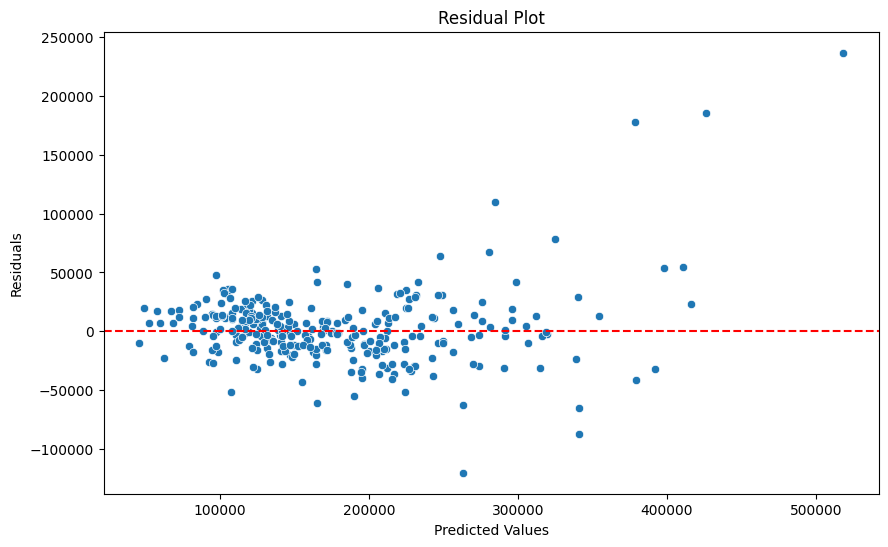

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd



X_train1 = X_train[["OverallQual"]]
X_test1 = X_test[["OverallQual"]]

# Apply log transformation to the target variable
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

lr_model = LinearRegression()

print("Training the Linear Regression model...")
lr_model.fit(X_train1, y_train_log)
print("Training complete.")

y_pred_log = lr_model.predict(X_test1)

rmse_log = np.sqrt(mean_squared_error(y_test_log, y_pred_log))
print(f"\nRoot Mean Squared Error (on log scale): {rmse_log:.4f}")

# Inverse transform the predictions and actual values back to the original scale
y_test_orig = np.expm1(y_test_log)
y_pred_orig = np.expm1(y_pred_log)

rmse_orig = np.sqrt(mean_squared_error(y_test_orig, y_pred_orig))
print(f"RMSE on original dollar scale: {rmse_orig:,.2f}")

Training the Linear Regression model...
Training complete.

Root Mean Squared Error (on log scale): 0.2311
RMSE on original dollar scale: 47,869.64


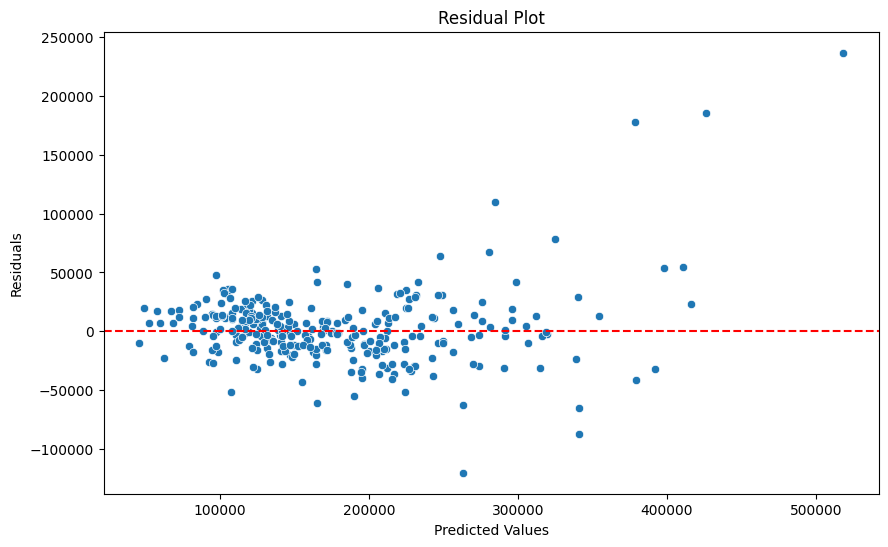

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residuals
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [28]:
  from sklearn.metrics import mean_squared_error, mean_absolute_error
  import numpy as np

  # MSE (Mean Squared Error)
  mse = mean_squared_error(y_test, y_pred)

  # MAE (Mean Absolute Error)
  mae = mean_absolute_error(y_test, y_pred)

  # RMSE (Root Mean Squared Error)
  rmse = np.sqrt(mse)

  print(f"MSE  : {mse:.2f}")
  print(f"MAE  : {mae:.2f}")
  print(f"RMSE : {rmse:.2f}")



MSE  : 1010607723.38
MAE  : 19793.98
RMSE : 31790.06


In [29]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2:.4f}")


R^2 Score: 0.8682


In [30]:
print(X_train.columns)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'MSZoning_FV', 'MSZoning_RL',
       'MSZoning_RM', 'LotShape_IR1', 'LotShape_Reg', 'LandContour_Bnk',
       'LotConfig_CulDSac', 'Neighborhood_CollgCr', 'Neighborhood_Edwards',
       'Neighborhood_NAmes', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_Sawyer', 'Neighborhood_Somerst', 'Condition1_Feedr',
       'BldgType_1Fam', 'HouseStyle_1.5Fin', 'HouseStyle_2Story',
       'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_HdBoard',
       'Exterior1st_MetalSd', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng',
       'Exterior2nd_MetalSd', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng',
       'MasVnrType_BrkFace'

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Train
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
y_pred = lr_model.predict(X_test)

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

# MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)


print(f"MSE  : {mse:.2f}")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")

MSE  : 1040959637.67
MAE  : 19629.50
RMSE : 32263.91


In [32]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_TA,GarageCond_TA,PavedDrive_N,PavedDrive_Y,SaleType_New,SaleType_WD,SaleCondition_Partial
254,20,70.0,8400,5,6,1957,1957,0.0,922,392,...,False,True,False,True,True,False,True,False,True,False
1066,60,59.0,7837,6,7,1993,1994,0.0,0,799,...,False,True,False,True,True,False,True,False,True,False
638,30,67.0,8777,5,7,1910,1950,0.0,0,796,...,False,False,False,False,False,False,False,False,True,False
799,50,60.0,7200,5,7,1937,1950,252.0,569,162,...,False,False,True,True,True,False,True,False,True,False
380,50,50.0,5000,5,6,1924,1950,0.0,218,808,...,False,False,True,True,True,False,True,False,True,False


In [33]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


# 1. Stochastic Gradient Descent (SGD)

sgd_reg = SGDRegressor(max_iter=200, learning_rate='invscaling', eta0=0.01)
sgd_reg.fit(X_train, y_train)
y_pred_sgd = sgd_reg.predict(X_test)
rmse_sgd = np.sqrt(mean_squared_error(y_test, y_pred_sgd))
r2_sgd = r2_score(y_test, y_pred_sgd)


In [34]:

# 2. Full-batch Gradient Descent (Approx)
gd_reg = SGDRegressor(max_iter=1000, learning_rate='constant', eta0=0.01)
gd_reg.fit(X_train, y_train)
y_pred_gd = gd_reg.predict(X_test)
rmse_gd = np.sqrt(mean_squared_error(y_test, y_pred_gd))
r2_gd = r2_score(y_test, y_pred_gd)

# Print results
print("\nRegression Comparison:")
print(f"SGD RMSE: {rmse_sgd:.2f}, R2: {r2_sgd:.4f}")
print(f"GD RMSE: {rmse_gd:.2f}, R2: {r2_gd:.4f}")



Regression Comparison:
SGD RMSE: 29051117511958892.00, R2: -110030187230217637986304.0000
GD RMSE: 568635865295150400.00, R2: -42155540529291603415662592.0000


In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

learning_rates = [0.0001, 0.001, 0.01, 0.1]
epochs = [100, 500, 1000]
results = []

for lr in learning_rates:
    for epoch in epochs:
        model = SGDRegressor(max_iter=epoch, eta0=lr, learning_rate='constant', random_state=42)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)

        results.append((lr, epoch, rmse, r2))
        print(f"Learning Rate: {lr}, Epochs: {epoch} --> RMSE: {rmse:.2f}, R2: {r2:.4f}")

# Find the best configuration
best = min(results, key=lambda x: x[2])  # minimizing RMSE
print("\nBest configuration:")
print(f"Learning Rate: {best[0]}, Epochs: {best[1]} --> RMSE: {best[2]:.2f}, R2: {best[3]:.4f}")


Learning Rate: 0.0001, Epochs: 100 --> RMSE: 32423.17, R2: 0.8629
Learning Rate: 0.0001, Epochs: 500 --> RMSE: 32423.17, R2: 0.8629
Learning Rate: 0.0001, Epochs: 1000 --> RMSE: 32423.17, R2: 0.8629
Learning Rate: 0.001, Epochs: 100 --> RMSE: 35351.55, R2: 0.8371
Learning Rate: 0.001, Epochs: 500 --> RMSE: 35351.55, R2: 0.8371
Learning Rate: 0.001, Epochs: 1000 --> RMSE: 35351.55, R2: 0.8371
Learning Rate: 0.01, Epochs: 100 --> RMSE: 59146.15, R2: 0.5439
Learning Rate: 0.01, Epochs: 500 --> RMSE: 59146.15, R2: 0.5439
Learning Rate: 0.01, Epochs: 1000 --> RMSE: 59146.15, R2: 0.5439
Learning Rate: 0.1, Epochs: 100 --> RMSE: 5613356744214.59, R2: -4108009631753947.5000
Learning Rate: 0.1, Epochs: 500 --> RMSE: 5613356744214.59, R2: -4108009631753947.5000
Learning Rate: 0.1, Epochs: 1000 --> RMSE: 5613356744214.59, R2: -4108009631753947.5000

Best configuration:
Learning Rate: 0.0001, Epochs: 100 --> RMSE: 32423.17, R2: 0.8629


Testing learning rate: 0.0001


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Testing learning rate: 0.001
Testing learning rate: 0.01
Testing learning rate: 0.1


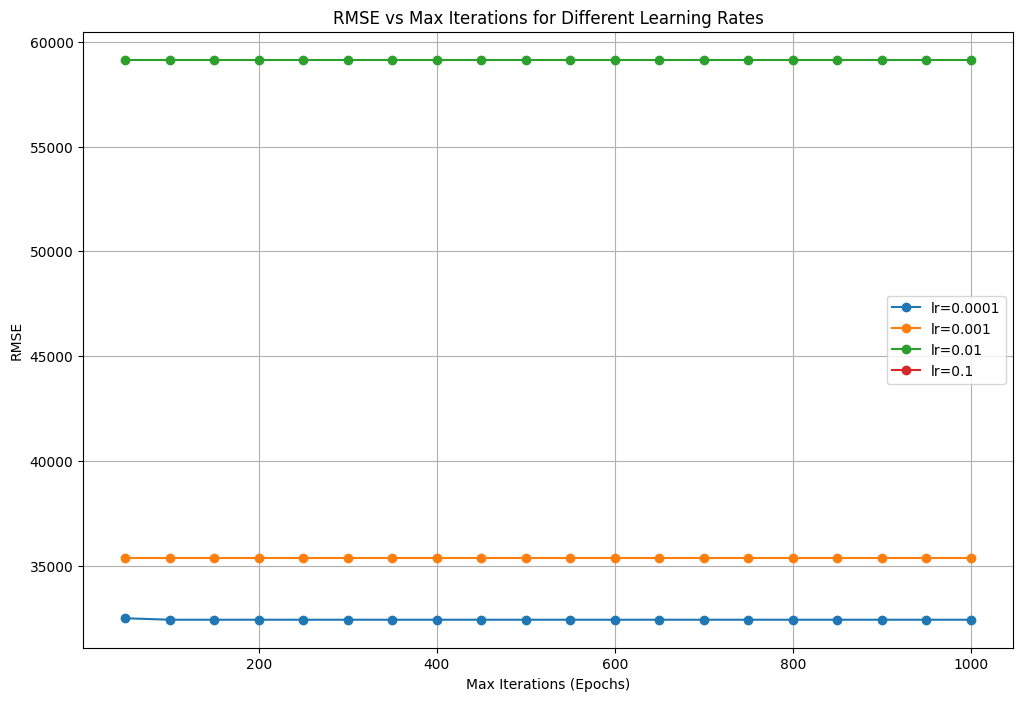

In [36]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import numpy as np


learning_rates = [0.0001, 0.001, 0.01, 0.1]
epochs_list = list(range(50, 1050, 50))

plt.figure(figsize=(12, 8))

for lr in learning_rates:
    rmses = []
    print(f"Testing learning rate: {lr}")
    for n_epochs in epochs_list:

        model = SGDRegressor(max_iter=n_epochs, eta0=lr, learning_rate='constant', random_state=42, warm_start=False)

        # Fit the model from scratch
        model.fit(X_train_scaled, y_train)

        y_pred = model.predict(X_test_scaled)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        if rmse > 1e10:
            rmses.append(np.nan)
        else:
            rmses.append(rmse)


    plt.plot(epochs_list, rmses, label=f"lr={lr}", marker='o')

plt.xlabel("Max Iterations (Epochs)")
plt.ylabel("RMSE")
plt.title("RMSE vs Max Iterations for Different Learning Rates")
plt.legend()
plt.grid(True)
# plt.ylim(0, 500000)
plt.show()

In [37]:
import numpy as np

y_train_log = np.log1p(y_train)

final_model_log = SGDRegressor(max_iter=1000, eta0=0.0001, random_state=42, learning_rate='constant')

final_model_log.fit(X_train_scaled, y_train_log)

y_pred_log = final_model_log.predict(X_test_scaled)
y_pred_final = np.expm1(y_pred_log)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))
print(f"New RMSE after log transform: {rmse:.2f}")

New RMSE after log transform: 30154.71


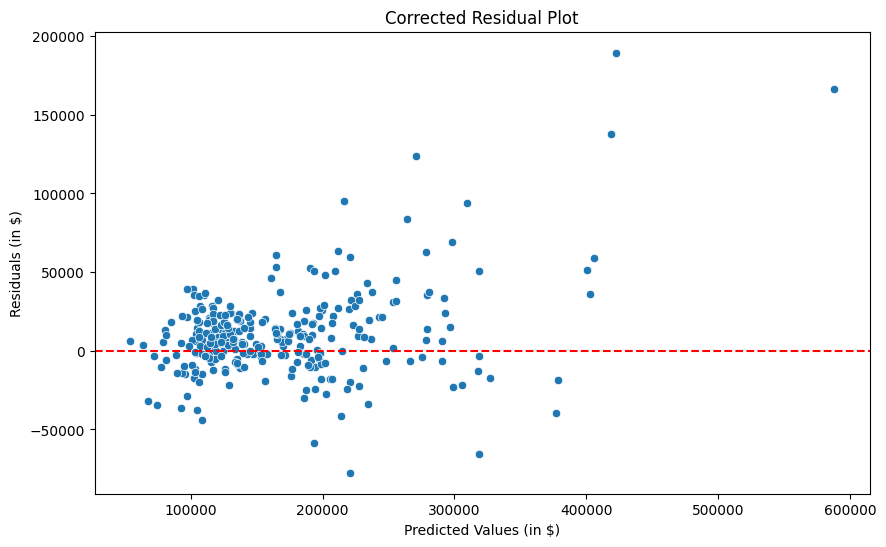

In [38]:

y_pred_log = final_model_log.predict(X_test_scaled)

y_pred_on_original_scale = np.expm1(y_pred_log)

residuals_correct = y_test - y_pred_on_original_scale

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_on_original_scale, y=residuals_correct) # Use the corrected variables
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values (in $)")
plt.ylabel("Residuals (in $)")
plt.title("Corrected Residual Plot")
plt.show()

In [39]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred_on_original_scale)

rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_on_original_scale)


print("--- Model Performance Metrics ---")
print(f"MSE       : {mse:,.2f}")
print(f"RMSE      : {rmse:,.2f}")
print(f"R-squared : {r2:.4f}")

--- Model Performance Metrics ---
MSE       : 909,306,324.13
RMSE      : 30,154.71
R-squared : 0.8815


In [40]:
print(rmse)

30154.70650055463


In [42]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error

y_train_log = np.log1p(y_train)
ridge = Ridge(alpha =10 , random_state = 42)
ridge.fit(X_train_scaled,y_train_log)
y_pred_ridge_log = ridge.predict(X_test_scaled)
y_pred_ridge = np.expm1(y_pred_ridge_log)
rsme_ridge  = np.sqrt(mean_squared_error(y_test,y_pred_ridge))

lasso = Lasso(alpha = 0.01 , random_state = 42 , max_iter=10000)
lasso.fit(X_train_scaled , y_train_log)

y_pred_lasso_log = lasso.predict(X_test_scaled)
y_pred_lasso = np.expm1(y_pred_lasso_log)
rmse_lasso = np.sqrt(mean_squared_error(y_test,y_pred_lasso))
print(f"Ridge RSME : {rsme_ridge:.2f}")
print(f"lasso RSME : {rmse_lasso:.2f}")


Ridge RSME : 27552.67
lasso RSME : 28987.05


In [47]:
alphas = [0.01, 0.1, 1, 10, 50, 100,0.001,0.0001]
for a in alphas:
    ridge = Ridge(alpha=a).fit(X_train_scaled, y_train_log)
    y_pred = np.expm1(ridge.predict(X_test_scaled))
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"Alpha={a}, Ridge RMSE={rmse:.2f}")


Alpha=0.01, Ridge RMSE=27671.09
Alpha=0.1, Ridge RMSE=27680.86
Alpha=1, Ridge RMSE=27682.04
Alpha=10, Ridge RMSE=27552.67
Alpha=50, Ridge RMSE=27624.15
Alpha=100, Ridge RMSE=27871.87
Alpha=0.001, Ridge RMSE=27669.79
Alpha=0.0001, Ridge RMSE=27669.66


In [51]:
print("Ridge Coefficients:", ridge.coef_)
print("Lasso Coefficients:", lasso.coef_)


Ridge Coefficients: [-2.31997288e-02 -1.56760253e-02  1.65676969e-02  8.46680507e-02
  4.68134605e-02  1.51596233e-02  1.39483046e-02 -4.20583558e-04
 -8.40962897e-03  4.91414370e-03  3.28535773e-03  1.51348797e-02
  1.08537166e-01  3.05104217e-02  1.38513733e-02  1.82013675e-02
  2.08573849e-02  8.57265116e-04  1.50650296e-02 -1.99096592e-01
  5.15229326e-02  8.86624177e-03 -2.62487350e-03  1.50931169e-02
  1.74753976e-02 -1.45544103e-02 -2.66238349e-03 -7.29717589e-03
 -1.69252246e-02  1.10440064e-02 -3.06558035e-03 -2.48120611e-02
 -1.48267347e-02  1.67388781e-02 -7.18477133e-03 -7.24023881e-03
  3.93928262e-03 -1.38466863e-02  4.39534641e-03 -1.04137138e-02
 -3.45754302e-02 -2.37160582e-02 -1.54517797e-02 -3.98810244e-03
  3.76851754e-03 -7.82422777e-03 -1.77151458e-02  2.81127425e-03
  5.56964260e-03  2.18738134e-02  2.05422710e-02  2.43621740e-02
  1.60306371e-02  1.45478593e-02  7.58839075e-03  7.50154859e-03
  1.98167380e-03  1.76807810e-02  3.83690450e-02  3.11870557e-02
  2.6

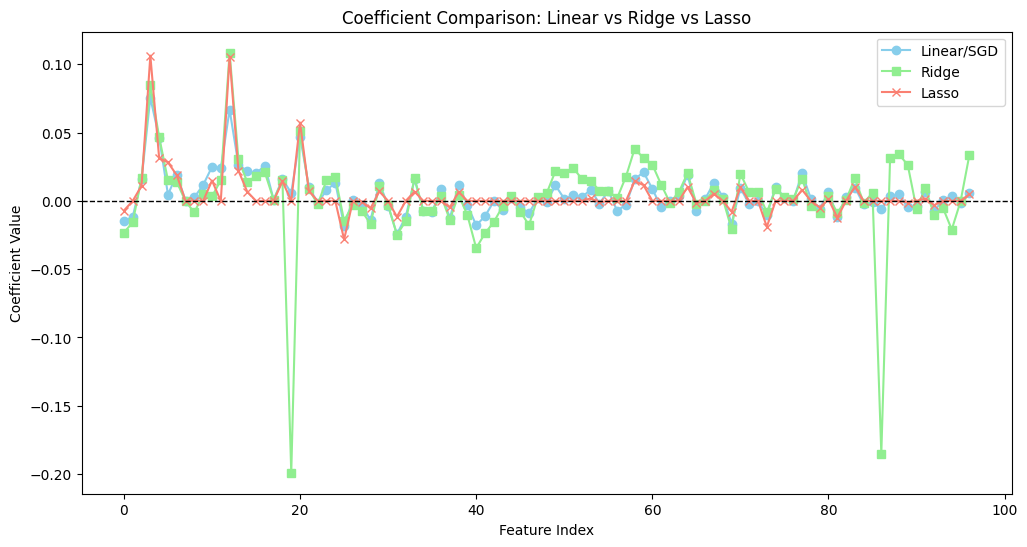

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Get coefficients
coef_linear = final_model_log.coef_
coef_ridge = ridge.coef_
coef_lasso = lasso.coef_

# Plot comparison
plt.figure(figsize=(12, 6))
plt.plot(coef_linear, 'o-', label="Linear/SGD", color="skyblue")
plt.plot(coef_ridge, 's-', label="Ridge", color="lightgreen")
plt.plot(coef_lasso, 'x-', label="Lasso", color="salmon")

plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("Coefficient Comparison: Linear vs Ridge vs Lasso")
plt.legend()
plt.show()
